# Project: Wrangling and Analyzing Data

## Introduction:
In this project, the tweet archive of WeRateDogs (a Twitter account that rates peoples' dogs) would be gathered (in various formats), assessed, cleaned and used for deriving good and fair insights, then presentations of visualizations to explain the insights.
The steps taken in the wrangling of the data were dutifully documented as follows:

## Data Gathering
In this section, the data needed for the project analyses would be gathered and loaded into the workbook.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load in the WeRateDogs Twitter archive data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#load in the image_predictions data
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#load in the additional data(tweet_json.txt)
#create an empty list to save variables in
df_list= []
#open the data and read line by line
with open('tweet-json.txt', 'r') as add_data:
    for each_line in add_data:
        line = json.loads(each_line)
        tweet_id = line['id']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']
#append the variables to the empty list earlier created using dict
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
#convert to DataFrame
df_tweets = pd.DataFrame(df_list, columns= ['tweet_id', 'retweet_count', 'favorite_count'])

In [5]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, the data would be assessed and issues detected both visually and programmatically would be documented for later cleaning.
The detected issues would be grouped according to quality and tidiness for easy cleaning.

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


#### The columns with missing rows in the column are those irrelevant to our analyses, they are replies urls

In [8]:
#check for duplicated tweets
twitter_archive['tweet_id'].duplicated().any()

False

In [9]:
#check for duplicates in whole table
twitter_archive.duplicated().any()

False

There seemed to be no duplicates in the table

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#check for duplicated tweets in table
image_predictions['tweet_id'].duplicated().any()

False

In [12]:
#check for duplicates in whole table
image_predictions.duplicated().any()

False

#### There are neither missing rows nor duplicates in table

In [13]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [14]:
#check for duplicated tweets
df_tweets['tweet_id'].duplicated().any()

False

In [15]:
#check for duplicates in whole table
df_tweets.duplicated().any()

False

## Quality issues
### **twitter_archive table**
* #####  **incorrect datatypes**
1. tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns should be strings(objects)
2. timestamp, retweeted_status_timestamp should be datetime datatype, not objects

* ##### **Incorrect names**
3. some texts **without names** were saved with different words ('a', 'an', 'by', 'my', 'not', 'actually', 'one', 'quite', 'such' 'the', 'none') extracted from the texts. Other dog names incorrectly extracted were:
4. 'O' instead of O'Malley for tweet_id 776201521193218049
5. 'Al' instead of 'Al Cabone' for tweet_id 770414278348247044
6. 'my' instead of 'Zoey' for tweet_id 765395769549590528
7. 'a' for ('Jacob', tweet_id 671743150407421952; 'Rufus', tweet_id 671147085991960577; 'Spork', tweet_id 670427002554466305; 'Cherokee', tweet_id 670361874861563904; 'Alphred', tweet_id 669923323644657664; 'Alfredo', tweet_id 669564461267722241; 'Leroi', tweet_id 668955713004314625; 'Chuk', tweet_id 668507509523615744; 'Alfonso', tweet_id 668171859951755264; 'Cheryl', tweet_id 667861340749471744; 'Jessiga', tweet_id 667773195014021121; 'Klint', tweet_id 667538891197542400; 'Kohl', tweet_id 667470559035432960; 'Daryl', tweet_id 667177989038297088)
8. rows in columns(doggo, floofer, pupper, puppo) without stages had None as value
* ##### **wrong ratings**
9. some ratings were wrongly extracted. e.g tweet_id 716439118184652801 had 50/50 rating instead of 11/10, tweet_id 722974582966214656 had 4/20 instead of 13/10
10. some rating_denominator are above or below 10
##### **irrelevant columns/ rows in table**
11. source, timestamp, retweeted_status_timestamp, expanded_urls columns are irrelevant to our analysis
12. some rows(tweets) contain retweets and replies
### image_predictions table

13. **incorrect datatype**: tweet_id should be object, not int
14. some of the predicted images were not dogs

### df_tweets table
15. **incorrect datatype**: tweet_id should be object, not int

## Tidiness issues
### twitter_archive table
1. ##### **unconformity of stages columns**
* the stages columns(doggo, floofer, pupper and puppo) should be in one column

2. the three tables should be in a single table for easy analysis

## Cleaning Data
In this section, all issues(quality and tidiness issues) documented above would be cleaned

In [16]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_clean = df_tweets.copy()

## Quality Issues:
### Issue #1:

#### Define:
drop rows where 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' are not nulls as they signified the rows were not original tweets

#### Code:

In [17]:
def drop(a):
    twitter_archive_clean.drop(index = (twitter_archive_clean[twitter_archive_clean[a].notnull()].index), inplace= True)
drop('in_reply_to_status_id')
drop('in_reply_to_user_id')
drop('retweeted_status_id')
drop('retweeted_status_user_id')

#### Test:

In [18]:
#the columns above should be null and the number of rows in the dataset reduced
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2:

#### Define:
From the three tables, change tweet_id, datatype to strings(objects)

#### Code

In [19]:
def dtype(x):
    x['tweet_id']= x['tweet_id'].astype(str)
dtype(twitter_archive_clean)
dtype(image_predictions)
dtype(df_tweets)

#### Test

In [20]:
twitter_archive_clean['tweet_id'].dtype, image_predictions['tweet_id'].dtype, df_tweets['tweet_id'].dtype

(dtype('O'), dtype('O'), dtype('O'))

### Issue #3:

#### Define
From twitter_archive_clean table, change timestamp and retweeted_status_timestamp datatypes to datetime datatype

In [21]:
col_list = ['timestamp', 'retweeted_status_timestamp']
for col in col_list:
    twitter_archive_clean[col] = pd.to_datetime(twitter_archive_clean[col])

#### Code

#### Test

In [22]:
twitter_archive_clean['timestamp'].dtype, twitter_archive_clean['retweeted_status_timestamp'].dtype

(datetime64[ns, UTC], dtype('<M8[ns]'))

### Issue #4:

#### Define:
From twitter_archive_clean table, replace the foolowing wrongly extracted names:
* 'O' to O' Malley for tweet_id 776201521193218049
* 'Al' instead of 'Al Cabone' for tweet_id 770414278348247044
* 'my' instead of 'Zoey' for tweet_id 765395769549590528

#### Code:

In [23]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== '776201521193218049', 'name'] = "O' Malley"
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== '770414278348247044', 'name'] = "Al Cabone"
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== '765395769549590528', 'name'] = "Zoey"

#### Test:

In [24]:
check_list =['O', 'Al','my']
for val in check_list:
    assert val not in twitter_archive_clean['name'].values

### Issue #5:

#### Define:
From twitter_archive_clean table, replace names with 'a', 'an', 'by', 'not', 'actually', 'one', 'quite' ,'just', 'officially', 'light', 'space', 'such' 'the', and 'none' with null to indicate missing names

#### Code:

In [25]:
val_list = ['a', 'an', 'by', 'not', 'actually', 'one', 'quite','just', 'officially', 'light', 'space', 'such','the','very','None', 'getting', 'incredibly', 'infuriating']
for value in val_list:
    twitter_archive_clean['name'].replace(value, np.NaN, inplace= True)

#### Test:

In [26]:
check_list = ['a', 'an', 'by', 'not', 'actually', 'one', 'quite','just', 'officially', 'light', 'space', 'such' 'the', 'None']
for value in val_list:
    assert val not in twitter_archive_clean['name'].values

### Issue #6:

#### Define:
correctly fill the names of the tweet IDs below (which previously had 'a' as their extracted names)
* 'Jacob', tweet_id 671743150407421952; 'Rufus', tweet_id 671147085991960577; 'Spork', tweet_id 670427002554466305; 'Cherokee', tweet_id 670361874861563904; 'Alphred', tweet_id 669923323644657664; 'Alfredo', tweet_id 669564461267722241; 'Leroi', tweet_id 668955713004314625; 'Chuk', tweet_id 668507509523615744; 'Alfonso', tweet_id 668171859951755264; 'Cheryl', tweet_id 667861340749471744; 'Jessiga', tweet_id 667773195014021121; 'Klint', tweet_id 667538891197542400; 'Kohl', tweet_id 667470559035432960; 'Daryl', tweet_id 667177989038297088

#### Code:

In [27]:
def name_change(a, b):
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== a, 'name'] = b 
                             
name_change('671743150407421952', "Jacob")
name_change('671147085991960577', "Rufus")
name_change('670427002554466305', "Spork")
name_change('670361874861563904', "Cherokee")
name_change('669923323644657664', "Alphred")
name_change('669564461267722241', "Alfredo")
name_change('668955713004314625', "Leroi")
name_change('668507509523615744', "Chuk")
name_change('668171859951755264', "Alfonso")
name_change('667861340749471744', "Cheryl")
name_change('667773195014021121', "Jessiga")
name_change('667538891197542400', "Klint")
name_change('667470559035432960', "Kohl")  
name_change('667177989038297088', "Daryl")

#### Test:

In [28]:
id_list = ['671743150407421952', '671147085991960577', '670427002554466305', '670361874861563904', '669923323644657664', '669564461267722241', '668955713004314625','668507509523615744']
for ids in id_list:
    print(twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== ids, 'name']);

2034    Jacob
Name: name, dtype: object
2066    Rufus
Name: name, dtype: object
2116    Spork
Name: name, dtype: object
2125    Cherokee
Name: name, dtype: object
2146    Alphred
Name: name, dtype: object
2161    Alfredo
Name: name, dtype: object
2191    Leroi
Name: name, dtype: object
2218    Chuk
Name: name, dtype: object


### Issue #7:

#### Define:
remove columns not needed for analysis

#### Code:

In [29]:
twitter_archive_clean.drop(columns= ([ 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls']), axis = 1, inplace = True)

#### Test:

In [30]:
twitter_archive_clean.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #8:

#### Define:
change the wrongly extracted ratings denominator for the following tweet ids:
* tweet_id 716439118184652801 which had 50/50 rating instead of 11/10
* tweet_id 722974582966214656 which had 4/20 rating instead of 13/10
* tweet_id 740373189193256964 which had 9/11 rating instead of 14/10
* tweet_id 682962037429899265 which had 7/11 rating instead of 10/10
* tweet_id 666287406224695296 which had 1/2 rating instead of 9/10

#### Code:

In [31]:
def numerator(a):
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== a, 'rating_numerator'] = twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== a, 'text'].str.extract(r'(\d+(?=/10))')[0]
numerator('716439118184652801')
numerator('722974582966214656')
numerator('740373189193256964')
numerator('682962037429899265')
numerator('666287406224695296')

In [32]:
def denominator(a):
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== a, 'rating_denominator'] = 10
denominator('716439118184652801')
denominator('722974582966214656')
denominator('740373189193256964')
denominator('682962037429899265')
denominator('666287406224695296')

#### Test:

In [33]:
id_list = ['716439118184652801','722974582966214656','740373189193256964','682962037429899265','666287406224695296']
for ids in id_list:
    print(twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== ids, 'rating_numerator'])
#convert back to int datatype
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(int)

1202    11
Name: rating_numerator, dtype: object
1165    13
Name: rating_numerator, dtype: object
1068    14
Name: rating_numerator, dtype: object
1662    10
Name: rating_numerator, dtype: object
2335    9
Name: rating_numerator, dtype: object


In [34]:
id_list = ['716439118184652801','722974582966214656','740373189193256964','682962037429899265','666287406224695296']
for ids in id_list:
    print(twitter_archive_clean.loc[twitter_archive_clean['tweet_id']== ids, 'rating_denominator'])

1202    10
Name: rating_denominator, dtype: int64
1165    10
Name: rating_denominator, dtype: int64
1068    10
Name: rating_denominator, dtype: int64
1662    10
Name: rating_denominator, dtype: int64
2335    10
Name: rating_denominator, dtype: int64


### Issue #9:

#### Define:
Count the number of entries which had denominators greater or less than 10 and drop (if it would not affect the dataset), to ensure fair analysis

#### Code:

In [35]:
twitter_archive_clean.query('rating_denominator != 10')['rating_denominator'].count()

12

In [36]:
#since there are only about twelve tweets with rating denominators not equal to 10,
#the rows can be dropped to ensure fair analysis when working with ratings
twitter_archive_clean.drop(index = (twitter_archive_clean.query('rating_denominator != 10').index), axis = 0, inplace = True)

#### Test:

In [37]:
twitter_archive_clean.query('rating_denominator != 10')['rating_denominator'].count()

0

### Issue #10:

#### Define:
from the image_predictions table, drop columns not needed for analysis

#### Code:

In [38]:
image_predictions.drop('jpg_url', axis = 1, inplace = True)

#### Test:

In [39]:
assert 'jpg_url' not in image_predictions.columns.values

## Tidiness Issues:
### Issue #11:

#### Define:
combine the four dog stages columns into a single column

#### Code:

In [40]:
twitter_archive_clean['stage'] = twitter_archive_clean['doggo'] + ',' + twitter_archive_clean['floofer'] + ',' + twitter_archive_clean['pupper'] + ',' + twitter_archive_clean['puppo']
twitter_archive_clean['stage'].value_counts()

None,None,None,None        1749
None,None,pupper,None       221
doggo,None,None,None         72
None,None,None,puppo         23
None,floofer,None,None        9
doggo,None,pupper,None        9
doggo,None,None,puppo         1
doggo,floofer,None,None       1
Name: stage, dtype: int64

In [41]:
def stage_clean(a,b):
    twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace(a, b)
stage_clean('None,None,None,None', 'None')
stage_clean('None,None,pupper,None', 'pupper')
stage_clean('doggo,None,None,None', 'doggo')
stage_clean('None,None,None,puppo', 'puppo')
stage_clean('None,floofer,None,None', 'floofer')
stage_clean('doggo,None,pupper,None', 'doggo, pupper')
stage_clean('doggo,None,None,puppo', 'doggo, puppo')
stage_clean('doggo,floofer,None,None', 'doggo, floofer')

In [42]:
#drop the doggo, floofer, pupper and puppo columns
drop_list = ['doggo','floofer','pupper','puppo']
for col in drop_list:
    twitter_archive_clean.drop(col, axis = 1, inplace= True)

#### Test:

In [43]:
twitter_archive_clean.sample(3)

,tweet_id,text,rating_numerator,rating_denominator,name,stage
1282,708738143638450176,This is Coco. She gets to stay on the Bachelor...,11,10,Coco,None
31,886258384151887873,This is Waffles. His doggles are pupside down....,13,10,Waffles,None
2206,668631377374486528,Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,5,10,Zeek,None


### Issue #12:

#### Define:
combine the three dataframes into one

#### Code:

In [44]:
#merge the first two datasets, then merge on the third
df1 = pd.merge(twitter_archive_clean, df_tweets, how = "inner", on = "tweet_id")
df = pd.merge(df1, image_predictions, how = "inner", on = "tweet_id")

#### Test: 

In [45]:
df.head(3)

,tweet_id,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,8853,39467,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,6514,33819,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,4328,25461,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
df.to_csv("twitter_archive_master.csv", index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [47]:
#the project would be analyzed based on the value predicted by p1_dog
#which happened to be the prediction with highest confidence interval
df_new = df.query('p1_dog == True')

In [48]:
#what names of dogs had the top five total favorite_count ever?
df_new.groupby('name')['favorite_count'].sum().nlargest(5)

name
Bo         136148
Zoey       133776
Duddles    107956
Stephan    107015
Jamesy     106827
Name: favorite_count, dtype: int64

In [49]:
#top five names with most retweet_count
df_new.groupby('name')['retweet_count'].sum().nlargest(5)

name
Stephan    56625
Bo         54924
Duddles    45849
Buddy      37686
Zoey       35236
Name: retweet_count, dtype: int64

In [50]:
#top five most liked stages
df_new.groupby('stage')['favorite_count'].sum().nlargest(5)

stage
None             10782249
pupper            1158974
doggo              986705
puppo              423856
doggo, pupper       97024
Name: favorite_count, dtype: int64

In [51]:
#combinations of names and stages(defined, not null) with highest average likes 
df_new.query('stage != "None"').groupby(['name', 'stage'])['favorite_count'].mean().nlargest(5)

name    stage 
Jamesy  pupper    106827.0
Bo      doggo      95450.0
Barney  doggo      48410.0
Cupid   doggo      40325.0
Astrid  doggo      38074.0
Name: favorite_count, dtype: float64

In [52]:
#proprtion of dogs rated ten or below
ten = df_new.query('rating_numerator <= 10').count()
total = df_new['rating_numerator'].count()
proportion = ten/total
proportion['rating_numerator']

0.3695801789401239

In [53]:
#does number of dogs per image affect its prediction?
more_img = df_new.query('img_num > 1').count()
img_true = df_new.count()
proportion = more_img/img_true
proportion['img_num']

0.14934618031658636

### Insights:
1. Names like Bo, Stephan, Zoey, Duddles, Jamsey and Buddy were observed to be most liked.

2. A pupper dog named Jamsey had a higher posibility of being liked more than other pupper dogs, likewise doggo dogs named Bo, Barney, Cupid or Astrid had higher possibillity of being liked compared to other doggo dog names.

3. The possibility of @we_rate_dogs on twitter to rate a dog 10 or below (over 10) is not very slim, about 40%

4. Having more than two number of dogs per images does not affect its prediction on it being dog or not.

### Visualization

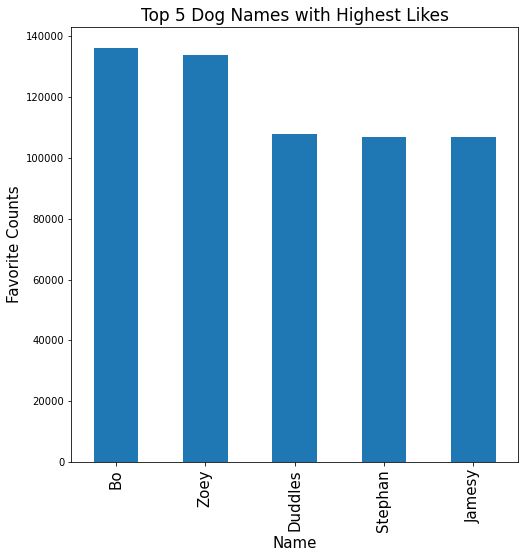

In [54]:
#what names of dogs had the top five total favorite_count ever?
fav_name = df_new.groupby('name')['favorite_count'].sum().nlargest(5)
fav_name.plot(kind = 'bar', figsize =(8,8))
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Favorite Counts', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.title('Top 5 Dog Names with Highest Likes', fontsize = 17);

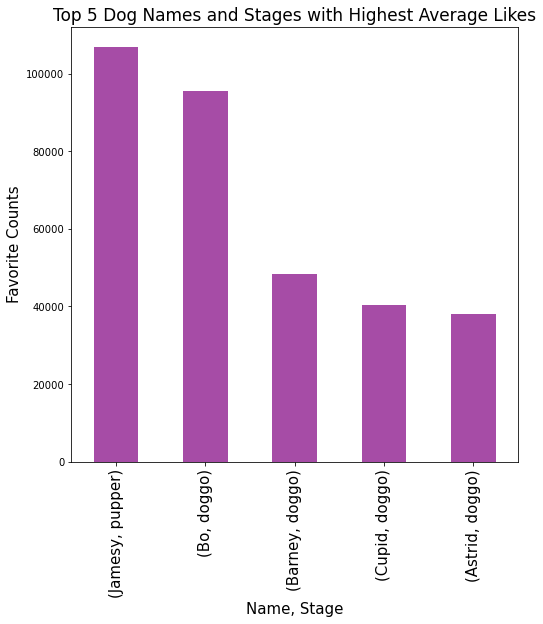

In [55]:
#combinations of names and stages(defined, not null) with highest average likes 
name_stage = df_new.query('stage != "None"').groupby(['name', 'stage'])['favorite_count'].mean().nlargest(5)
name_stage.plot(kind = 'bar', figsize =(8,8), color = 'purple', alpha = .7)
plt.xlabel('Name, Stage', fontsize = 15)
plt.ylabel('Favorite Counts', fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Top 5 Dog Names and Stages with Highest Average Likes', fontsize = 17);

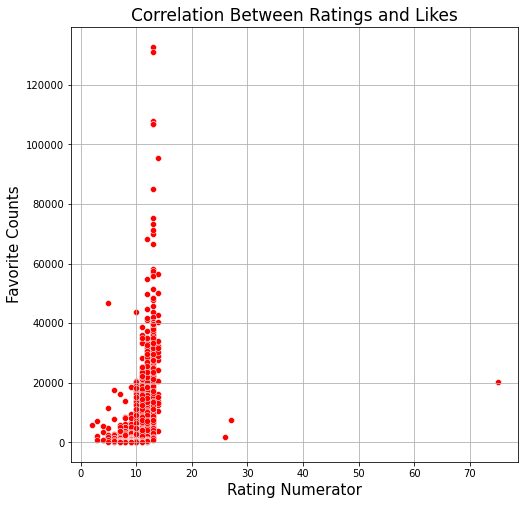

In [56]:
#does rating_numerator correlate with favorite_count?
plt.figure(figsize =(8,8))
sns.scatterplot(data = df_new, x= 'rating_numerator', y= 'favorite_count', color = 'red')
plt.xlabel('Rating Numerator', fontsize = 15)
plt.ylabel('Favorite Counts', fontsize = 15)
plt.title('Correlation Between Ratings and Likes', fontsize = 17)
plt.grid(True);

There seemed to be no relationship between ratings and favorite_counts. Hence, a higher or lower rating does not influence the number of likes

In [57]:
#what combination of names and stages were least liked?
name_stage = df_new.groupby(['name', 'stage'])['favorite_count'].mean().nsmallest(5)

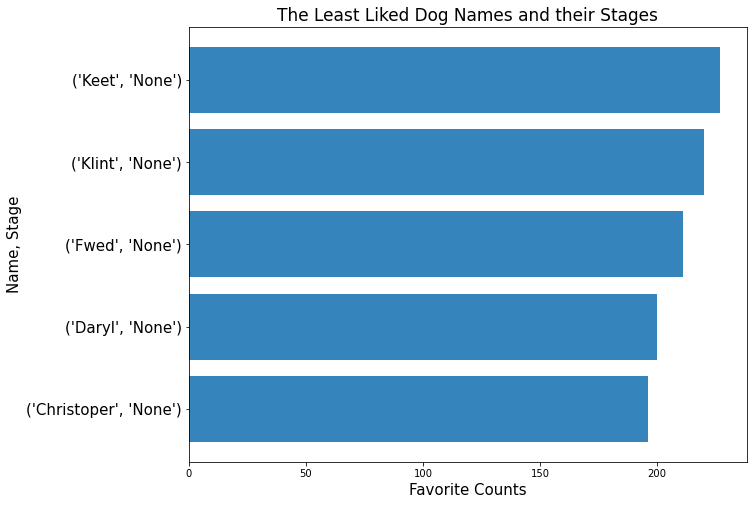

In [58]:
#name_stage.plot(kind = 'bar', figsize =(8,8))
plt.figure(figsize = (10,8))
plt.barh(np.arange(len(name_stage)), name_stage, alpha = .9)
plt.yticks(np.arange(len(name_stage)), name_stage.index, fontsize = 15)
plt.xlabel('Favorite Counts', fontsize = 15)
plt.ylabel('Name, Stage', fontsize = 15)
plt.title('The Least Liked Dog Names and their Stages', fontsize = 17);

Names like Christopher, Daryl, Fwed, Klint, Keet; with stages unspecified were least liked